In [32]:
import tensorflow as tf
from skimage import transform
from skimage import data
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
import random

In [3]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

#Multiply
result = tf.multiply(x1, x2)
print(result)

Tensor("Mul_1:0", shape=(4,), dtype=int32)


In [4]:
# Initialize the session
sess = tf.Session()
print(sess.run(result))
sess.close()

[ 5 12 21 32]


In [5]:
# Initialize Session and run result
with tf.Session() as sess:
    output = sess.run(result)
    print(output)

[ 5 12 21 32]


##  Loading Training and Test DataSet

In [12]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory,d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) for f in os.listdir(data_directory) if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

In [39]:
ROOT_PATH = "/home/vipul/Projects/Git/TensorFlow/"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

images, labels = load_data(train_data_directory)

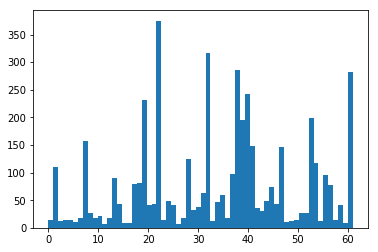

In [46]:
# Make a histogram with 62 bins of the `labels` data

plt.hist(labels, 62)
plt.show()

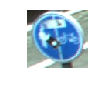

Shape: (75, 79, 3), min: 15, max: 255


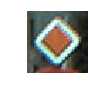

Shape: (44, 43, 3), min: 0, max: 255


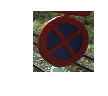

Shape: (207, 207, 3), min: 0, max: 255


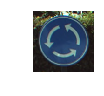

Shape: (131, 131, 3), min: 0, max: 255


In [53]:
# Visualizing the traffic sign

# Random indexs of the images you wanna see
traffic_sign = [300, 2251, 3650, 4000]

for i in range(len(traffic_sign)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_sign[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print('Shape: {0}, min: {1}, max: {2}'.format(images[traffic_sign[i]].shape,
                                                  images[traffic_sign[i]].min(),
                                                  images[traffic_sign[i]].max()))